In [1]:
import numpy as np
import pandas as pd  # library that handles data frames
import matplotlib.pyplot as plt # library for visulation basic
%matplotlib inline
import sklearn #scientific toolkit for ML
import seaborn as sns # library for visulation advance
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Titanic-Dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

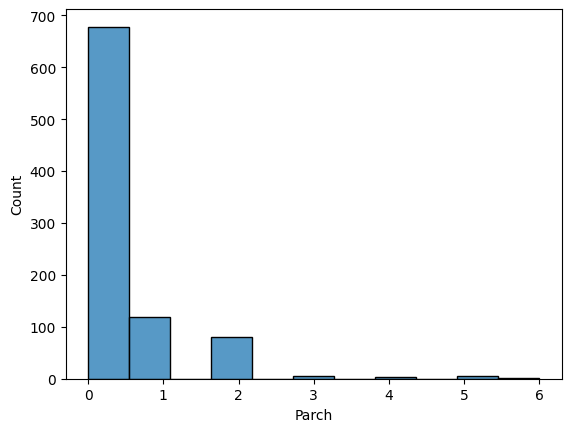

In [7]:
sns.histplot(df['Parch'],kde = False)
plt.show()

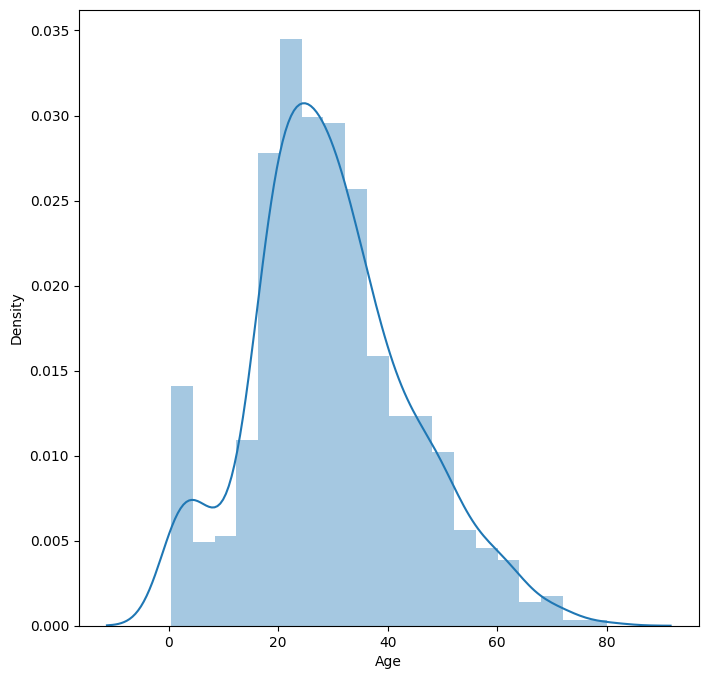

In [8]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'])
plt.show()

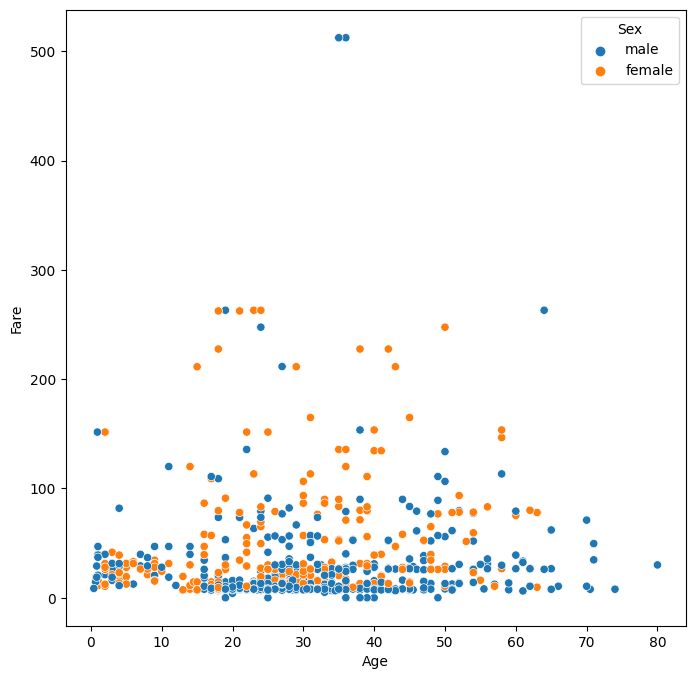

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age",y="Fare",hue = "Sex",data=df)
plt.show()

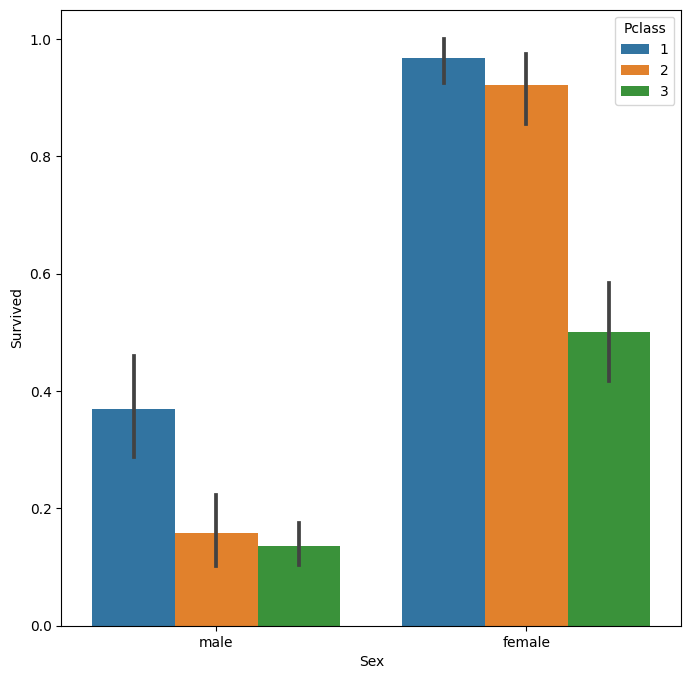

In [10]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex",y="Survived",hue ="Pclass",data=df)
plt.show()

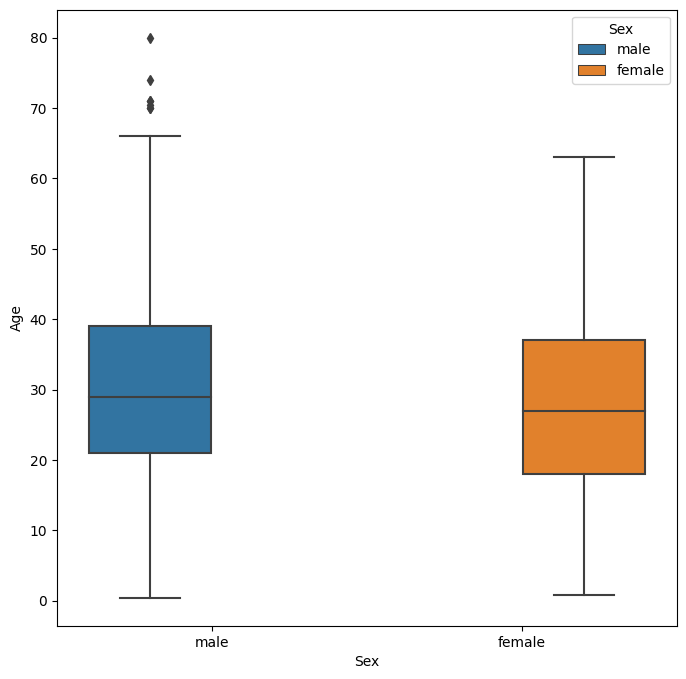

In [11]:
plt.figure(figsize = (8,8))
sns.boxplot(x="Sex",y="Age",hue ="Sex",data=df)
plt.show()


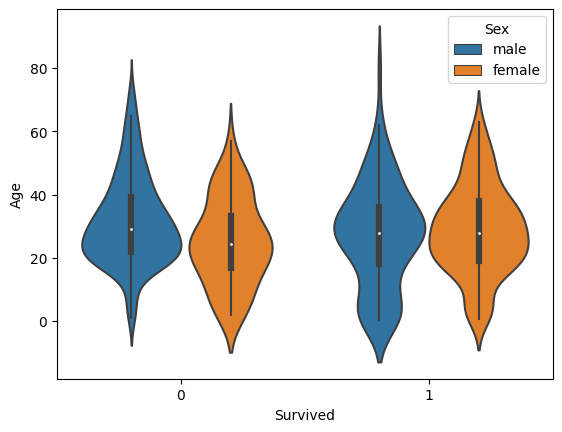

In [12]:
# plt.figure(figsize = (8,8))
sns.violinplot(x="Survived",y="Age",hue ="Sex",data=df)
plt.show()

### imputing null values

In [13]:
def random_impute(df,variable):
    df[variable+" random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index= df[df[variable].isnull()].index
    # loc(row number,column number)= value change
    df.loc[df[variable].isnull(),variable+" random"]=random_sample
    


In [14]:
random_impute(df,'Age')

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age random       0
dtype: int64

In [16]:
df.drop('Age',axis=1, inplace=True)

In [17]:
df.rename(columns={'Age random':'Age'},inplace= True)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age'],
      dtype='object')

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age              0
dtype: int64

In [20]:
df.drop('Cabin',axis = 1,inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Age          891 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [22]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [23]:
df['Sex']= pd.get_dummies(df["Sex"],drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    bool   
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Age          891 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 70.6+ KB


In [25]:
df.drop('Name',axis=1 , inplace = True)

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age'],
      dtype='object')

In [27]:
 val = df['Embarked'].mode()[0]

In [28]:
df['Embarked']=df['Embarked'].fillna(val)

In [29]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [30]:
df['Embarked']=df['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [31]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [32]:
df.drop('Ticket',axis= 1 ,inplace = True)

In [33]:
df.shape[1]

9

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    bool   
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Age          891 non-null    float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 56.7 KB


In [35]:
df["Sex"]=df["Sex"].astype(int)

## Now our data is ready for machine learning algorithm 

In [36]:
# split data to be used in the models
# create matrix of features
x = df.drop('Survived',axis = 1) # graps everything else but 'survived'

# create target variable
y = df['Survived']  # y is the column we want to predict



In [37]:
x.shape


(891, 8)

In [38]:
y.shape

(891,)

In [39]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### standard scalar

In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .20 ,random_state = 101)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [42]:
x_train_scaled.shape

(712, 8)

In [43]:
x_test_scaled.shape

(179, 8)

In [44]:
y_train.shape

(712,)

## Logistic regression

In [45]:
# import model
from sklearn.linear_model import LogisticRegression

In [46]:
#create instance of model
log_reg = LogisticRegression()

In [47]:
#pass training data into a model
log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred = log_reg.predict(x_test)

In [49]:

log_reg_accuracy = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy', log_reg_accuracy,'%')

Accuracy 79.33 %


## Descion Tree


In [50]:
#import model
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()

In [51]:
parameter={'max_depth':[None,1,2,3,4,5,6,7,8,9,12,13,14,15,16],'min_samples_split': [2 ,5,4,6,8,9,3, 10]}

In [52]:
g_search = GridSearchCV(estimator=Dtree, param_grid=parameter, cv=5, scoring='neg_mean_squared_error')
g_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13,
                                       14, 15, 16],
                         'min_samples_split': [2, 5, 4, 6, 8, 9, 3, 10]},
             scoring='neg_mean_squared_error')

In [53]:
# Get the best hyperparameters
best_params = g_search.best_params_
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

In [54]:

best_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred = best_model.predict(x_test)

In [57]:
Dtree_accuracy  = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy',Dtree_accuracy , '%')

Accuracy 79.33 %


## Random Forest

In [58]:

# import model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


In [59]:
paramter={
         'criterion':['gini', 'log_loss', 'entropy'],
         'max_depth':[2,3,4,6,8,10,20,12,16,18],
         'min_samples_split':[3,2,5,7,8,9,10,13,12]
}
from sklearn.model_selection import RandomizedSearchCV

In [60]:
g_search = RandomizedSearchCV(estimator=rfc, param_distributions=paramter, cv=5, scoring='neg_mean_squared_error')
g_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'log_loss',
                                                      'entropy'],
                                        'max_depth': [2, 3, 4, 6, 8, 10, 20, 12,
                                                      16, 18],
                                        'min_samples_split': [3, 2, 5, 7, 8, 9,
                                                              10, 13, 12]},
                   scoring='neg_mean_squared_error')

In [61]:
best_param = g_search.best_params_
best_criterion=best_param['criterion']
best_max_depth=best_param['max_depth']
best_min_samples_split=best_param['min_samples_split']

In [62]:
print(best_criterion)
print(best_max_depth)
print(best_min_samples_split)

entropy
6
9


In [63]:
best_model = RandomForestClassifier(criterion=best_criterion,max_depth=best_max_depth,min_samples_split=best_min_samples_split)
best_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=9)

In [64]:

from sklearn.metrics import accuracy_score

# prediction from the model
y_pred = best_model.predict(x_test)

In [65]:
rfc_accuracy = round(accuracy_score(y_test,y_pred) * 100,2)
print('Accuracy',rfc_accuracy,'%')

Accuracy 81.01 %


## Gradient Boosting

In [66]:
#import the model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


In [67]:
paramters={
         'loss':['gini', 'log_loss', 'entropy'],
         'max_depth':[3,4,6,8,10,20,12,16,18],
         'min_samples_split':[3,2,5,7,8,9,10,13,12],
         'learning_rate':[0.1,0.01,0.001]
}

In [68]:
g_search = RandomizedSearchCV(estimator=gbc,param_distributions=paramters,cv=5,scoring='neg_mean_squared_error')
g_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'loss': ['gini', 'log_loss', 'entropy'],
                                        'max_depth': [3, 4, 6, 8, 10, 20, 12,
                                                      16, 18],
                                        'min_samples_split': [3, 2, 5, 7, 8, 9,
                                                              10, 13, 12]},
                   scoring='neg_mean_squared_error')

In [69]:
best_para = g_search.best_params_
best_learning_rate=best_para['learning_rate']
best_max_dept=best_para['max_depth']
best_min_sample_split=best_para['min_samples_split']
best_loss=best_para['loss']

In [70]:
good_model=GradientBoostingClassifier(learning_rate=best_learning_rate,loss=best_loss,max_depth=best_max_dept,min_samples_split=best_min_sample_split)
good_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_split=7)

In [71]:
y_pred = good_model.predict(x_test)

In [72]:

gbc_accuracy = round(accuracy_score(y_test,y_pred) *100,2)

print('Accuracy ',gbc_accuracy , '%')

Accuracy  78.21 %


## comparing the Accuracies

In [73]:
#sample model scores (replace these with your actual model scores )
model_scores = {
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree Classifier': Dtree_accuracy,
    'Random Forest Classifier': rfc_accuracy,
    'Gradient Boosting Classifier':gbc_accuracy

}
# sort the model scores in decending order based on their values
sorted_scores = sorted(model_scores.items(),key =lambda x:x[1], reverse = True)

# Display the ranking of model
print('Model ranking')
for rank, (model_name,score) in enumerate(sorted_scores,start =1):
  print(f"{rank}. {model_name}: {score}")

Model ranking
1. Random Forest Classifier: 81.01
2. Logistic Regression: 79.33
3. Decision Tree Classifier: 79.33
4. Gradient Boosting Classifier: 78.21
